# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import os
import time
from random import uniform
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

from scipy.stats import linregress
from citipy import citipy
from pprint import pprint

from api_keys import weather_api_key
from api_keys import g_key

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

# generate random coordinates
while len(cities) < 600:
    x, y = uniform(-180,180), uniform(-90, 90)
    city = citipy.nearest_city(x, y).city_name
    city = city.title()
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set starting count and set for display
count = 0
Set = 1

# Create cities dataframe
cities_df=pd.DataFrame(cities)
cities_df=cities_df.rename(columns={0:"City"})
cities_df["Lat"]=""
cities_df["Lng"]=""
cities_df["Max Temp"]=""
cities_df["Humidity"]=""
cities_df["Cloudiness"]=""
cities_df["Wind Speed"]=""
cities_df["Country"]=""
cities_df["Date"]=""

# Create URL and determine units
url = 'http://api.openweathermap.org/data/2.5/weather?q='

# print initial message
print('Beginning Data Retrieval')
print('------------------------------')


# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
#     time.sleep(0.005)
    merge_url = url + row["City"] + "&appid=" + weather_api_key + "&units=metric"
    city_data = requests.get(merge_url).json()
    try:
        print(f'Processing Record {count+1} of Set {Set} | {row["City"]}')
        # inserting data into corresponding columns
        cities_df.loc[index,"Lat"]=city_data["coord"]["lat"]
        cities_df.loc[index,"Lng"]=city_data["coord"]["lon"]
        cities_df.loc[index,"Max Temp"]=city_data["main"]["temp"]
        cities_df.loc[index,"Humidity"]=city_data["main"]["humidity"]
        cities_df.loc[index,"Cloudiness"]=city_data["clouds"]["all"]
        cities_df.loc[index,"Wind Speed"]=city_data["wind"]["speed"]
        cities_df.loc[index,"Country"]=city_data["sys"]["country"]
        cities_df.loc[index,"Date"]=city_data["dt"]
        count += 1
        if count % 50 == 0:
            Set = Set + 1
            count = 0
    except:
        print(f'City "{row["City"]}" not found. Skipping...')
        cities_df=cities_df.drop(index)

# Print last ending message
print("-----------------------------\nData Retrieval Complete\n-----------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | Qaanaaq
Processing Record 2 of Set 1 | Taolanaro
City "Taolanaro" not found. Skipping...
Processing Record 2 of Set 1 | Dikson
Processing Record 3 of Set 1 | Tirat Karmel
Processing Record 4 of Set 1 | Masindi
Processing Record 5 of Set 1 | Itarema
Processing Record 6 of Set 1 | Ushuaia
Processing Record 7 of Set 1 | Longyearbyen
Processing Record 8 of Set 1 | Port Elizabeth
Processing Record 9 of Set 1 | Astipalaia
City "Astipalaia" not found. Skipping...
Processing Record 9 of Set 1 | Touros
Processing Record 10 of Set 1 | Iqaluit
Processing Record 11 of Set 1 | Hermanus
Processing Record 12 of Set 1 | Vardo
Processing Record 13 of Set 1 | Barentsburg
City "Barentsburg" not found. Skipping...
Processing Record 13 of Set 1 | Albany
Processing Record 14 of Set 1 | Porto Novo
Processing Record 15 of Set 1 | Belushya Guba
City "Belushya Guba" not found. Skipping...
Processing Record 15 of Set 1 | Senne

Processing Record 10 of Set 4 | Havelock
Processing Record 11 of Set 4 | Warri
Processing Record 12 of Set 4 | Paamiut
Processing Record 13 of Set 4 | Namibe
Processing Record 14 of Set 4 | Road Town
Processing Record 15 of Set 4 | Daura
Processing Record 16 of Set 4 | Barcelos
Processing Record 17 of Set 4 | Benguela
Processing Record 18 of Set 4 | Sozimskiy
Processing Record 19 of Set 4 | Tigri
City "Tigri" not found. Skipping...
Processing Record 19 of Set 4 | San-Pedro
Processing Record 20 of Set 4 | Salavat
Processing Record 21 of Set 4 | Baherden
Processing Record 22 of Set 4 | Carnarvon
Processing Record 23 of Set 4 | Mocuba
Processing Record 24 of Set 4 | Murgab
Processing Record 25 of Set 4 | Bathsheba
Processing Record 26 of Set 4 | Purpe
Processing Record 27 of Set 4 | Louisbourg
City "Louisbourg" not found. Skipping...
Processing Record 27 of Set 4 | Ambovombe
Processing Record 28 of Set 4 | Pedernales
Processing Record 29 of Set 4 | Muli
Processing Record 30 of Set 4 | Mog

Processing Record 29 of Set 7 | Dinsor
City "Dinsor" not found. Skipping...
Processing Record 29 of Set 7 | Inhambane
Processing Record 30 of Set 7 | Severodvinsk
Processing Record 31 of Set 7 | Fort William
Processing Record 32 of Set 7 | Rocha
Processing Record 33 of Set 7 | Felipe Carrillo Puerto
Processing Record 34 of Set 7 | Sorland
Processing Record 35 of Set 7 | Ushtobe
Processing Record 36 of Set 7 | Bafata
Processing Record 37 of Set 7 | Barao De Melgaco
Processing Record 38 of Set 7 | Codrington
Processing Record 39 of Set 7 | Porto Belo
Processing Record 40 of Set 7 | Paradwip
City "Paradwip" not found. Skipping...
Processing Record 40 of Set 7 | Hryshkivtsi
Processing Record 41 of Set 7 | Porto Santo
Processing Record 42 of Set 7 | Formoso Do Araguaia
City "Formoso Do Araguaia" not found. Skipping...
Processing Record 42 of Set 7 | Kyzyl-Suu
Processing Record 43 of Set 7 | Khammam
Processing Record 44 of Set 7 | Ayagoz
Processing Record 45 of Set 7 | Sorvag
City "Sorvag" n

Processing Record 45 of Set 10 | Matay
Processing Record 46 of Set 10 | Aksu
Processing Record 47 of Set 10 | Shchelyayur
City "Shchelyayur" not found. Skipping...
Processing Record 47 of Set 10 | Dolores
Processing Record 48 of Set 10 | Abu Kamal
Processing Record 49 of Set 10 | Nisia Floresta
Processing Record 50 of Set 10 | Sovetskiy
Processing Record 1 of Set 11 | Alghero
Processing Record 2 of Set 11 | Makinsk
Processing Record 3 of Set 11 | Itapaci
Processing Record 4 of Set 11 | Talcahuano
Processing Record 5 of Set 11 | Salaga
Processing Record 6 of Set 11 | Matara
Processing Record 7 of Set 11 | Estelle
Processing Record 8 of Set 11 | Kangavar
Processing Record 9 of Set 11 | Lagos
Processing Record 10 of Set 11 | Buraydah
Processing Record 11 of Set 11 | Luena
Processing Record 12 of Set 11 | Salamanca
Processing Record 13 of Set 11 | Skjold
Processing Record 14 of Set 11 | Awjilah
Processing Record 15 of Set 11 | Semey
Processing Record 16 of Set 11 | Tambopata
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# Write dataframe to csv
cities_df.to_csv(r'Cities_Data.csv',index=False)

# Copy CSV to dataframe
csv_df = pd.read_csv("Cities_Data.csv")
csv_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,-1.85,85,0,3.00,GL,1602773503
1,Dikson,73.51,80.55,-0.78,93,100,11.93,RU,1602773504
2,Tirat Karmel,32.76,34.97,26.60,65,40,5.10,IL,1602773504
3,Masindi,1.67,31.71,22.14,84,69,0.21,UG,1602773505
4,Itarema,-2.92,-39.92,31.55,53,3,8.68,BR,1602773505


In [25]:
# display summary table
csv_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.948330,1.933450,19.781468,62.427523,46.941284,3.953284,1.602774e+09
std,32.271229,56.233906,10.743318,23.053940,36.766656,2.407281,7.303779e+01
min,-54.800000,-122.830000,-4.000000,5.000000,0.000000,0.150000,1.602773e+09
25%,-7.260000,-52.950000,11.300000,46.000000,6.000000,2.130000,1.602774e+09
50%,20.200000,12.630000,20.740000,67.000000,42.000000,3.600000,1.602774e+09
75%,47.870000,45.040000,28.110000,79.000000,79.000000,5.350000,1.602774e+09
max,78.220000,141.970000,42.000000,100.000000,100.000000,16.500000,1.602774e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#  Get the indices of cities that have humidity over 100%.
humid100 = csv_df[csv_df.Humidity > 100].index
humid100
# no city with humidity > 100%

Int64Index([], dtype='int64')

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = csv_df.drop(csv_df.index[humid100], inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,-1.85,85,0,3.00,GL,1602773503
1,Dikson,73.51,80.55,-0.78,93,100,11.93,RU,1602773504
2,Tirat Karmel,32.76,34.97,26.60,65,40,5.10,IL,1602773504
3,Masindi,1.67,31.71,22.14,84,69,0.21,UG,1602773505
4,Itarema,-2.92,-39.92,31.55,53,3,8.68,BR,1602773505
...,...,...,...,...,...,...,...,...,...
540,Paez,5.10,-73.05,22.66,60,54,1.67,CO,1602773685
541,Sao Lourenco Do Sul,-31.37,-51.98,19.31,75,83,2.99,BR,1602773685
542,Dzilam Gonzalez,21.28,-88.93,27.86,65,0,0.98,MX,1602773686
543,Riberalta,-10.98,-66.10,28.00,74,75,1.74,BO,1602773672


In [28]:
# confirm the maximum humidity in the clean_city_data
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,19.948330,1.933450,19.781468,62.427523,46.941284,3.953284,1.602774e+09
std,32.271229,56.233906,10.743318,23.053940,36.766656,2.407281,7.303779e+01
min,-54.800000,-122.830000,-4.000000,5.000000,0.000000,0.150000,1.602773e+09
25%,-7.260000,-52.950000,11.300000,46.000000,6.000000,2.130000,1.602774e+09
50%,20.200000,12.630000,20.740000,67.000000,42.000000,3.600000,1.602774e+09
75%,47.870000,45.040000,28.110000,79.000000,79.000000,5.350000,1.602774e+09
max,78.220000,141.970000,42.000000,100.000000,100.000000,16.500000,1.602774e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

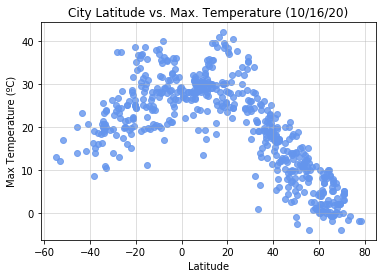

In [29]:
# capture the date that the script would run
date=time.strftime('%m/%d/%y')

plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], color = "cornflowerblue", marker = "o", alpha = ".8")
plt.grid(b=True, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (ºC)')
plt.title(f"City Latitude vs. Max. Temperature ({date})")

plt.savefig('output_data/Fig 1 - Lat_vs_Temp.png')
plt.show()

## Latitude vs. Humidity Plot

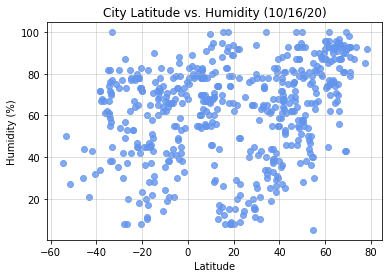

In [30]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color = "cornflowerblue", marker = "o", alpha = ".8")
plt.grid(b=True, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")

plt.savefig('output_data/Fig 2 - Lat_vs_Hum.png')
plt.show()

## Latitude vs. Cloudiness Plot

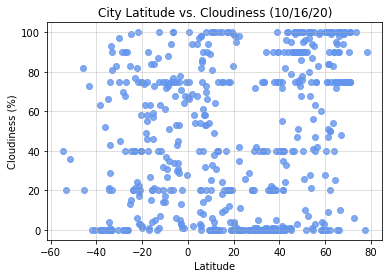

In [31]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color = "cornflowerblue", marker = "o", alpha = ".8")
plt.grid(b=True, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")

plt.savefig('output_data/Fig 3 - Lat_vs_Cld.png')
plt.show()

## Latitude vs. Wind Speed Plot

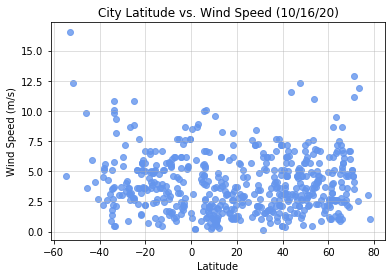

In [32]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color = "cornflowerblue", marker = "o", alpha = ".8")
plt.grid(b=True, alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")

plt.savefig('output_data/Fig 4 - Lat_vs_Wnd.png')
plt.show()

## Linear Regression

In [33]:
# split dataframe into northern and southern hemisphere
n_csv = clean_city_data[clean_city_data["Lat"]>=0]
s_csv = clean_city_data[clean_city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7673773704286194


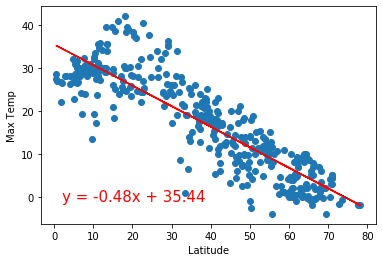

In [34]:
x_values = n_csv["Lat"]
y_values = n_csv["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,-1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.34345794836737353


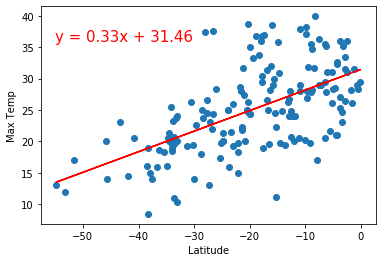

In [35]:
x_values = s_csv["Lat"]
y_values = s_csv["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07249994867149522


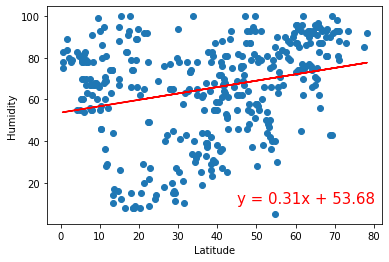

In [36]:
x_values = n_csv["Lat"]
y_values = n_csv["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.002455732256053344


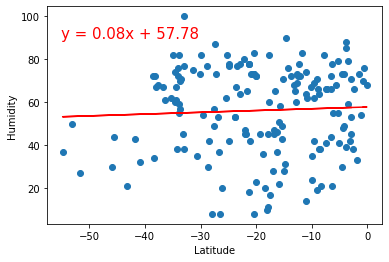

In [37]:
x_values = s_csv["Lat"]
y_values = s_csv["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07860153044342369


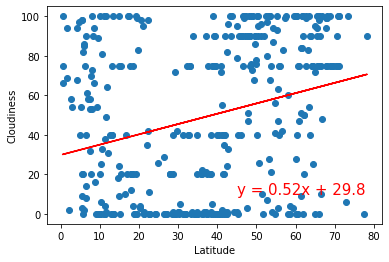

In [38]:
x_values = n_csv["Lat"]
y_values = n_csv["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02740625073253445


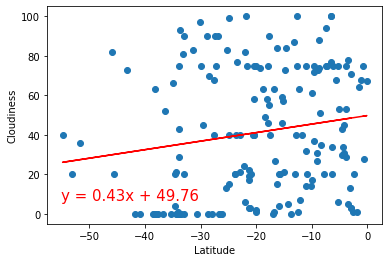

In [39]:
x_values = s_csv["Lat"]
y_values = s_csv["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.028074576089932843


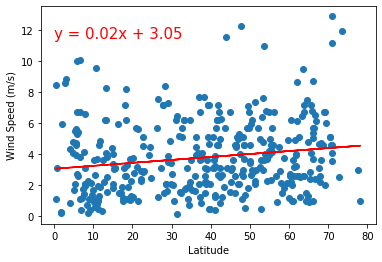

In [40]:
x_values = n_csv["Lat"]
y_values = n_csv["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,11.5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03275983429002408


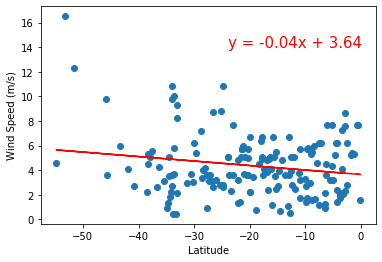

In [41]:
x_values = s_csv["Lat"]
y_values = s_csv["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-24,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

print(f"The r-value is: {rvalue**2}")
plt.show()